In [5]:
## importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [6]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")

In [7]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [9]:
 df.drop_duplicates(inplace= True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns.values

array(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype=object)

In [12]:
df.shape

(440833, 12)

In [13]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [14]:
X = df.drop(columns=['CustomerID', 'Churn'])  # Drop ID and target
y = df['Churn']

In [15]:
X.shape

(440833, 10)

In [16]:
X.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0


In [17]:
categorical_cols = [
    'Gender',
    'Subscription Type',
    'Contract Length'
]
numerical_cols = [
    'Age',
    'Tenure',
    'Usage Frequency',
    'Support Calls',
    'Payment Delay',
    'Total Spend',
    'Last Interaction'
]

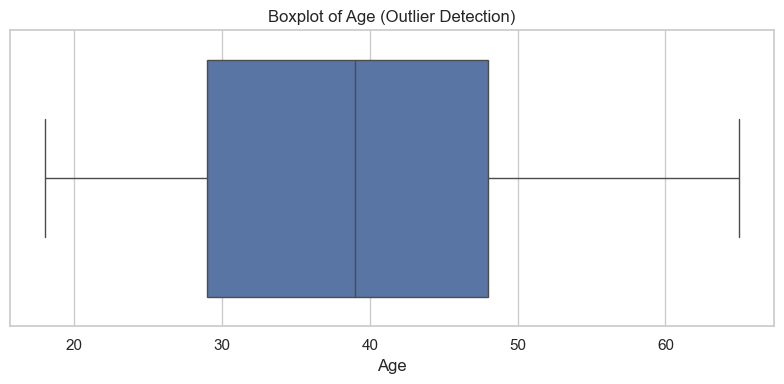

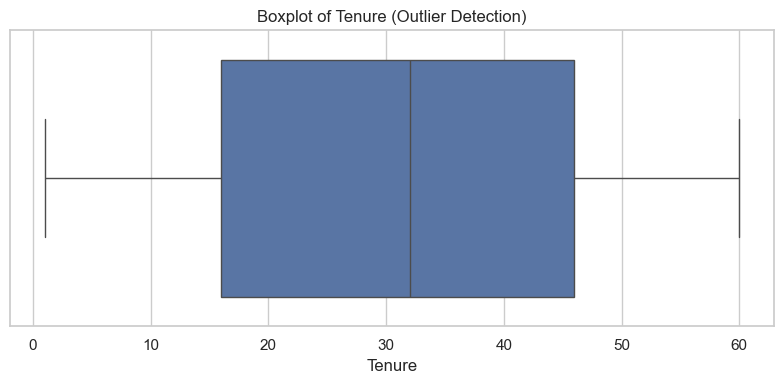

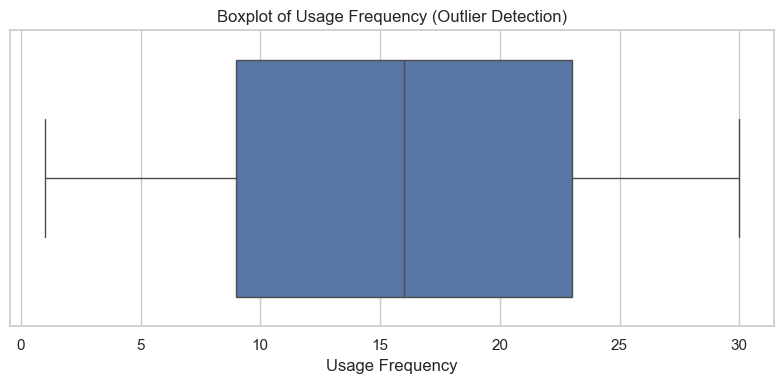

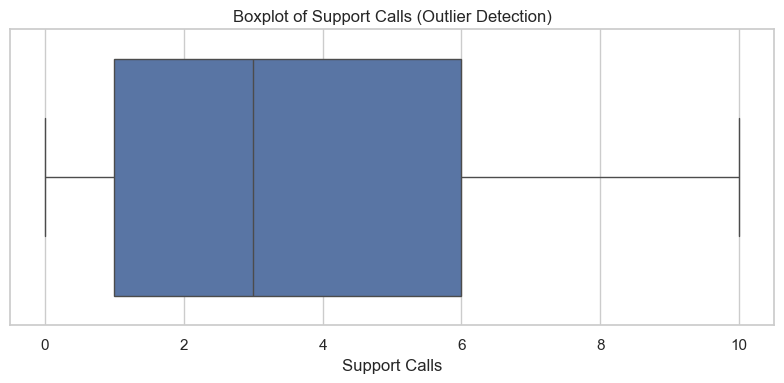

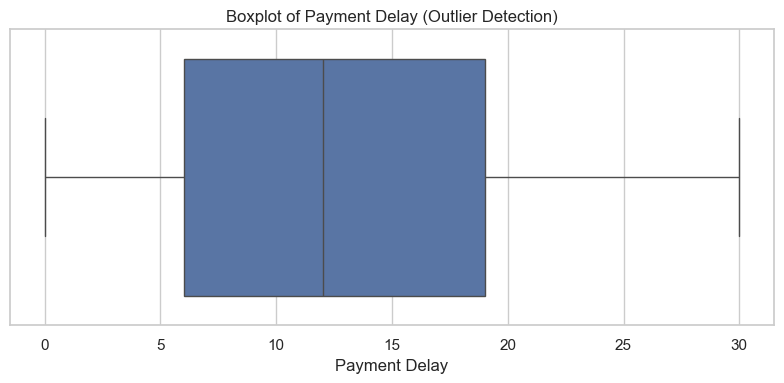

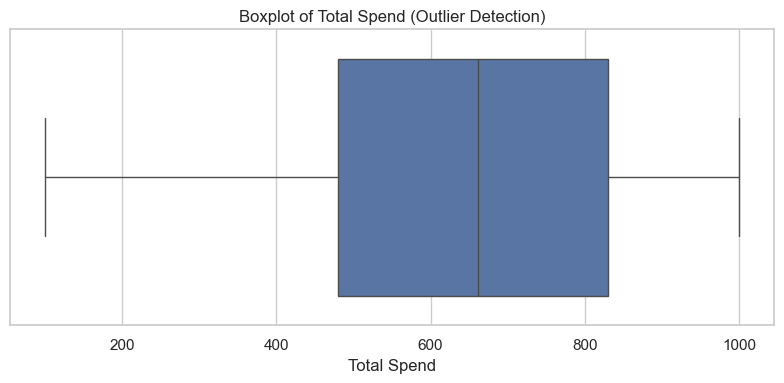

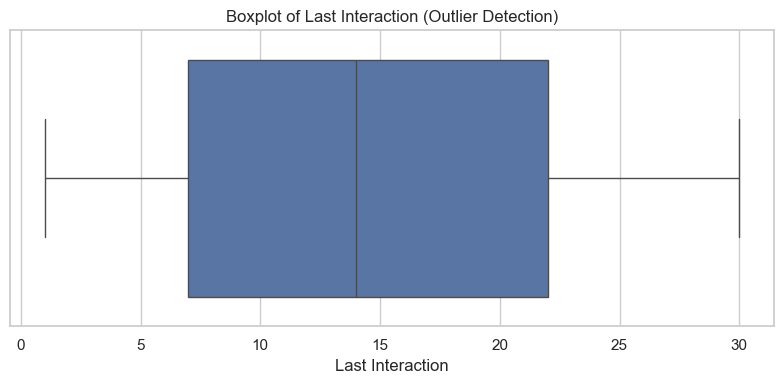

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume your DataFrame is called `df`
# df = pd.read_csv("your_file.csv")  # if needed

# Define the columns
numerical_cols = [
    'Age', 'Tenure', 'Usage Frequency', 'Support Calls',
    'Payment Delay', 'Total Spend', 'Last Interaction'
]

# Set the style
sns.set(style="whitegrid")

# Plot boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col} (Outlier Detection)')
    plt.tight_layout()
    plt.show()


In [32]:
# Pipeline for numerical features
cont_pl = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("standard_scaler", StandardScaler())
])

# Pipeline for categorical (ordinal-style) features
cat_ord_pl = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal_encoding", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])
# Combine both pipelines using ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ("cat_pipeline", cat_ord_pl, categorical_cols),
    ("num_pipeline", cont_pl, numerical_cols)
])

In [33]:
transformer

ColumnTransformer(transformers=[('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Gender', 'Subscription Type',
                                  'Contract Length']),
                                ('num_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 ['Age', 'Tenure', 'Usage Frequency',
                                  'Support Calls', 'Payment Delay',
                                  'Total Spend', 'Last Interaction'])])

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
final_pl = Pipeline(steps =[("transformer",transformer),("estimator",KNeighborsRegressor())])

In [37]:
final_pl

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoding',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Gender',
                                                   'Subscription Type',
                                                   'Contract Length']),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction'])])),
                ('estimator', KNeighborsRegressor())])

In [41]:
# Combine X and y temporarily to drop rows with missing target
train_df = X_train.copy()
train_df['target'] = y_train

# Drop rows with missing target
train_df = train_df.dropna(subset=['target'])

# Split back into X and y
X_train_clean = train_df.drop(columns='target')
y_train_clean = train_df['target']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=23)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(330624, 10)
(330624,)
(110209, 10)
(110209,)


In [42]:
final_pl.fit(X_train_clean, y_train_clean)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoding',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Gender',
                                                   'Subscription Type',
                                                   'Contract Length']),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction'])])),
                ('estimator', KNeighborsRegressor())])

In [43]:
y_pred =final_pl.predict(X_test)

In [44]:
y_pred

array([0., 1., 0., ..., 0., 1., 0.])

In [45]:
r2_score(y_test,y_pred)

0.864630664394739

In [46]:
### picking the final_pl2 object

import pickle

with open("Customer_Classify.pkl","wb") as f:
    pickle.dump(final_pl,f)

In [47]:
with open("Customer_Classify.pkl","rb") as f:
    model = pickle.load(f)

In [48]:
import pandas as pd

input_data = pd.DataFrame([{
    'Age': 30.0,
    'Gender': 'Female',
    'Tenure': 39.0,
    'Usage Frequency': 14.0,
    'Support Calls': 5.0,
    'Payment Delay': 18.0,
    'Subscription Type': 'Standard',
    'Contract Length': 'Annual',
    'Total Spend': 932.0,
    'Last Interaction': 17.0
}])

model.predict(input_data)


array([1.])